# CS 663 - Matplotlib

## Let's start with bar plots

3.9.1 (default, Jan  8 2021, 17:17:17) 
[Clang 12.0.0 (clang-1200.0.32.28)]


In [1]:
#Bar plot -- get some data for it first

# import pandas as pd

# df = pd.read_csv('cs_langs.csv')
# df

import pandas as pd

df = pd.read_csv('cs_langs.csv')

df

,Language,Minutes Used,Used in 2000s,Used in 2010s,Used in 2020s,Competence
0,C,13,13,0,0,2
1,C++,302,203,99,0,4
2,Java,1742,581,780,380,4
3,Python,1843,0,1406,437,4
4,Snap,48,48,0,0,2
5,SQL,851,281,287,283,3


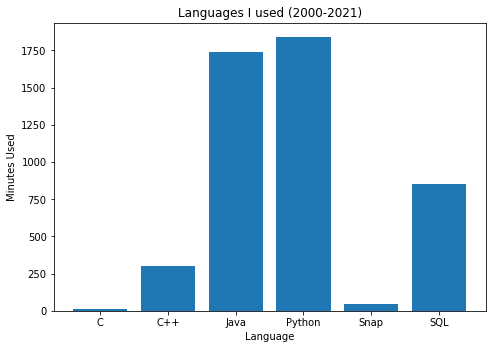

In [4]:
# Import the required libraries
import matplotlib.pyplot as plt



# Sometimes this line is required for showing the plot in the notebook.
%matplotlib inline

# Declare a figure
fig = plt.figure()



# The bar plot is described at https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html
ax = fig.add_axes([0, 0, 1, 1])  # Size -- Left, bottom, width, height

# Populate the figure with data
languages = df.Language
minutes = df['Minutes Used']  # Different ways of getting data from the dataframe.
ax.bar(languages, minutes)

# Add labels and title
ax.set_xlabel('Language')
ax.set_ylabel('Minutes Used')
ax.set_title('Languages I used (2000-2021)')

plt.show()

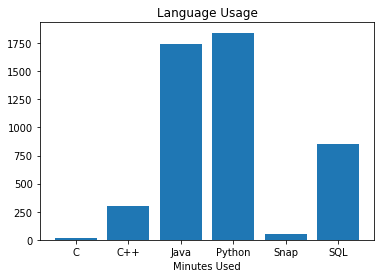

In [6]:
# The same plot, but horizontal... and with less code
plt.bar(df['Language'], df['Minutes Used'])
plt.xlabel('Minutes Used')   # Not set_xlabel(...) because... who knows?
plt.title('Language Usage')
plt.show()

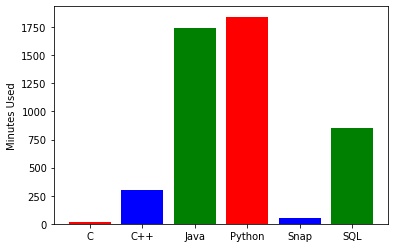

In [7]:
# Bars with different colours:
plt.bar(df['Language'], df['Minutes Used'], color=['red', 'blue', 'green']) # Colours get re-used, round-robin
plt.ylabel('Minutes Used')
plt.show()

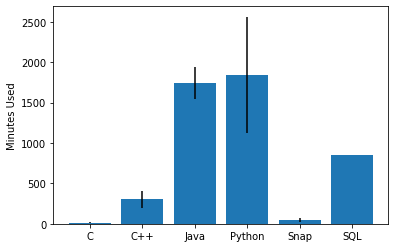

In [8]:
# Add error bars to plot. (We could also use numpy to get mean, stdev.)

lang_df = df.iloc[:,2:5]  # Get all the 2000 - 2020s data -- not necessary, but easier to understand?

bars = lang_df.mean(axis=1)  # Important for generating error bars next
error_bars = lang_df.std(axis=1)
plt.bar(df['Language'], df['Minutes Used'], yerr=error_bars)
plt.ylabel('Minutes Used')
plt.show()

## Onto line plots

In [9]:
df = pd.read_csv('renter_fraction.csv', sep='\t')   # It's a tab-separated value file, not a CSV, so... 
df

,Year,USA,California,San Francisco
0,2019,35.89,45.14,45.97
1,2018,36.05,45.18,45.03
2,2017,36.13,45.21,45.36
3,2016,36.88,46.36,46.40
4,2015,36.97,46.41,46.54
5,2014,36.90,46.27,46.80
6,2013,36.50,46.21,46.42
7,2012,36.09,45.97,46.98
8,2011,35.42,45.12,46.34
9,2010,34.65,44.36,45.57


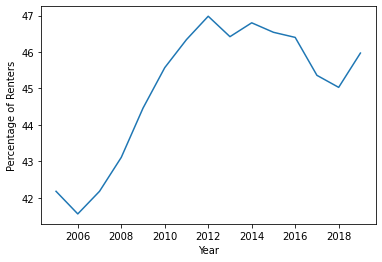

In [11]:
# Basic line plot:
plt.plot(df['Year'], df['San Francisco'])
plt.xlabel('Year')
plt.ylabel('Percentage of Renters')
plt.show()

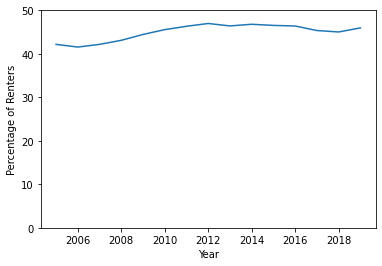

In [12]:
# This curve looks dramatic because it's not zero-based. We can change that with ylim
# (There's also xlim) 
plt.plot(df['Year'], df['San Francisco'])
plt.ylim(0, 50)
plt.xlabel('Year')
plt.ylabel('Percentage of Renters')
plt.show()

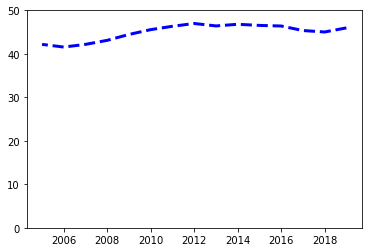

In [14]:
# Change the colour, line style:
plt.plot(df['Year'], df['San Francisco'], color='blue', linewidth=3, linestyle='dashed')
# linestyle could also be '--', '-.', etc.
plt.ylim(0, 50)
plt.show()

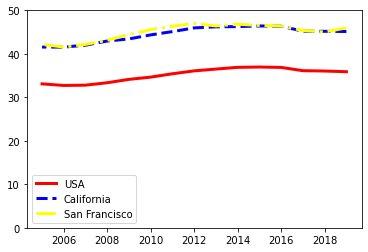

In [12]:
plt.plot(df['Year'], df['USA'], label='USA', color='red', linewidth=3, linestyle='-')
plt.plot(df['Year'], df['California'], label='California', color='blue', linewidth=3, linestyle='--')
plt.plot(df['Year'], df['San Francisco'], label='San Francisco', color='yellow', linewidth=3, linestyle='-.')
plt.ylim(0, 50)
plt.legend()
plt.show()

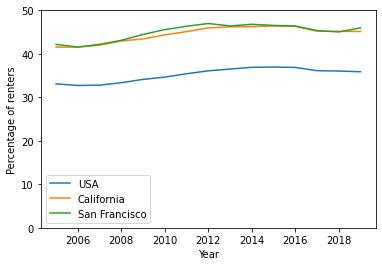

In [13]:
# So that's great, but annoying to get each of the labels. Refactor into a loop:

for label in df.columns[1:]:   # Picks up 'USA', 'California', 'San Francisco'
    plt.plot(df.Year, df[label], label=label)   # Relies on matplotlib default colour rotation
plt.ylim(0, 50)
plt.ylabel('Percentage of renters')
plt.xlabel('Year')
plt.legend()
plt.show()

## Scatterplots

In [14]:
# Scatterplots are most useful for displaying lots of data, so let's get a bigger dataset.
# This one is called the Ames Housing datasset, from https://www.kaggle.com/prevek18/ames-housing-dataset
# Much of this part of the notebook is from https://stackabuse.com/matplotlib-scatterplot-tutorial-and-examples/

df = pd.read_csv('AmesHousing.csv')
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


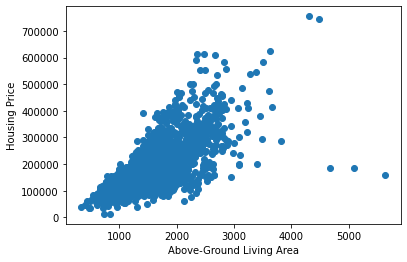

In [15]:
# Regular 2D scatter plot

plt.scatter(x=df['Gr Liv Area'], y=df['SalePrice'])
plt.xlabel('Above-Ground Living Area')
plt.ylabel('Housing Price')
plt.show()

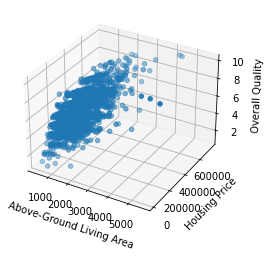

In [16]:
# A 3D plot is also possible by adding an additional dimension
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(df['Gr Liv Area'], df['SalePrice'], df['Overall Qual'])
ax.set_xlabel('Above-Ground Living Area')
ax.set_ylabel('Housing Price')
ax.set_zlabel('Overall Quality')
plt.show()